In [13]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

bucket_name = "lab4-data-ronansk2"
file_key = "vehicle0.csv"
aws_region = "us-east-2" 

s3 = boto3.client('s3', region_name=aws_region)

response = s3.get_object(Bucket=bucket_name, Key=file_key)
data = response['Body'].read().decode('utf-8')
df = pd.read_csv(StringIO(data))

print(df.head())

   timestep_time  vehicle_CO  vehicle_CO2  vehicle_HC  vehicle_NOx  \
0            0.0         0.0      2416.04        0.01         0.72   
1            1.0         0.0         0.00        0.00         0.00   
2            2.0         0.0         0.00        0.00         0.00   
3            3.0         0.0         0.00        0.00         0.00   
4            4.0         0.0         0.00        0.00         0.00   

   vehicle_PMx  vehicle_angle   vehicle_eclass  vehicle_electricity  \
0         0.01          42.25  HBEFA3/PC_G_EU4                  0.0   
1         0.00          42.25  HBEFA3/PC_G_EU4                  0.0   
2         0.00          42.25  HBEFA3/PC_G_EU4                  0.0   
3         0.00          40.62  HBEFA3/PC_G_EU4                  0.0   
4         0.00          34.08  HBEFA3/PC_G_EU4                  0.0   

   vehicle_fuel vehicle_id    vehicle_lane  vehicle_noise  vehicle_pos  \
0          1.04       veh0     5330181#0_0          65.15         5.10   
1   

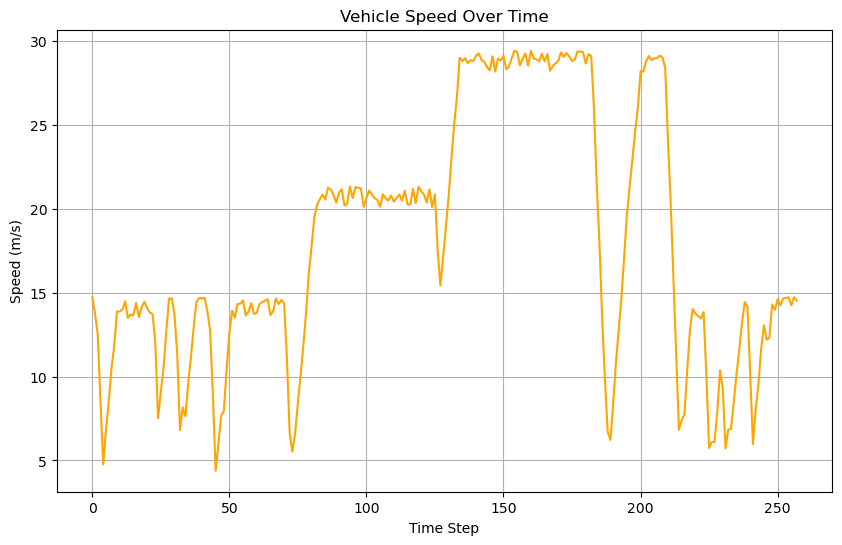

In [10]:
# Speed Over Time
plt.figure(figsize=(10, 6))
plt.plot(df['timestep_time'], df['vehicle_speed'], label='Vehicle Speed', color='orange')
plt.xlabel('Time Step')
plt.ylabel('Speed (m/s)')
plt.title('Vehicle Speed Over Time')
plt.grid()
plt.show()

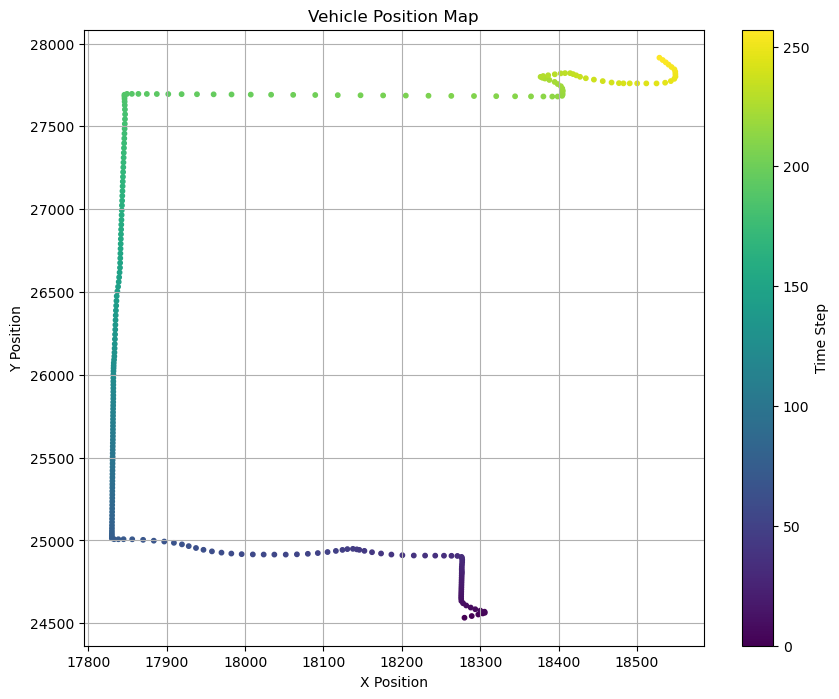

In [11]:
# Vehicle Position
plt.figure(figsize=(10, 8))
plt.scatter(df['vehicle_x'], df['vehicle_y'], c=df['timestep_time'], cmap='viridis', s=10)
plt.colorbar(label='Time Step')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Vehicle Position Map')
plt.grid()
plt.show()

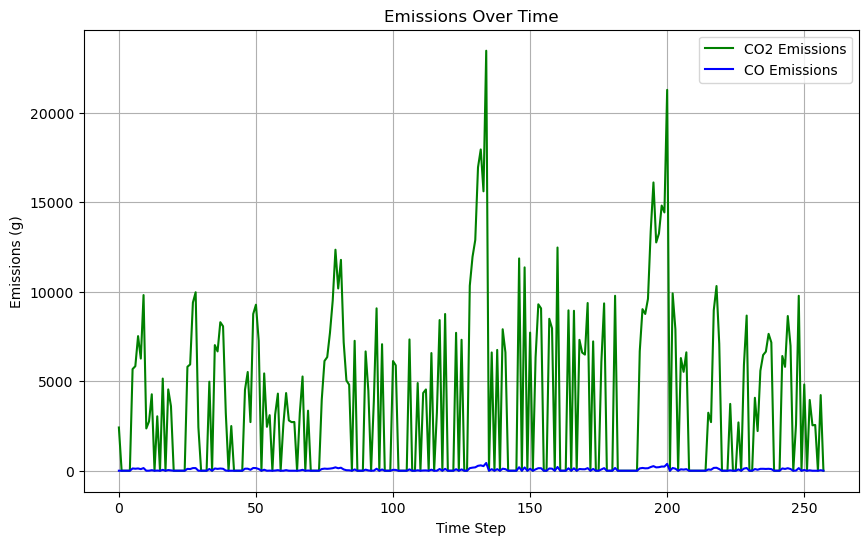

In [12]:
# Emissions Over Time
plt.figure(figsize=(10, 6))
plt.plot(df['timestep_time'], df['vehicle_CO2'], label='CO2 Emissions', color='green')
plt.plot(df['timestep_time'], df['vehicle_CO'], label='CO Emissions', color='blue')
plt.xlabel('Time Step')
plt.ylabel('Emissions (g)')
plt.title('Emissions Over Time')
plt.legend()
plt.grid()
plt.show()